In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from src.features.build_features import KMeans

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
true_seed_1 = np.array([1., 1., 1.])
true_seed_2 = np.array([3., 3., 3.])
true_seed_3 = np.array([7., 7., 7.])

In [9]:
data_1 = np.array([true_seed_1 + np.random.rand(3) for i in range(10)])
data_2 = np.array([true_seed_2 + np.random.rand(3) for i in range(10)])
data_3 = np.array([true_seed_3 + np.random.rand(3) for i in range(10)])
data = np.vstack([data_1, data_2, data_3])
np.random.shuffle(data)

In [19]:
df = pd.DataFrame(data, columns=['x1', 'x2', 'x3'])
df.head()

,x1,x2,x3
0,3.314715,3.294122,3.387625
1,1.915767,1.333512,1.510661
2,1.502832,1.938157,1.820118
3,3.560398,3.746270,3.926801
4,3.035554,3.312959,3.021787


In [20]:
km = KMeans()

In [21]:
km.fit(df.values, k=3, num_starts=10)

In [22]:
km.predict(df.values)

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2])

In [23]:
km.error_

123.69289350726858

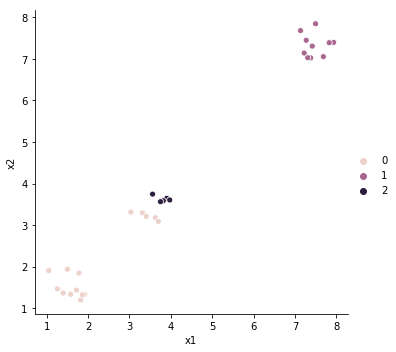

In [24]:
sns.relplot(x="x1", y="x2", data=df, hue=km.predict(df.values))

In [25]:
km100 = KMeans()
km100.fit(df.values, k=3, num_starts=100)

In [26]:
km100.error_

11.761637554622782

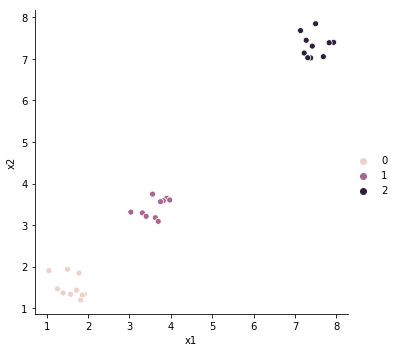

In [27]:
sns.relplot(x="x1", y="x2", data=df, hue=km100.predict(df.values))